In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('tipcars_preprocessed.csv', delimiter=';')

In [3]:
data_octavia = data[data['model'] == 'Octavia']

# Obraz tzpické Škody Octavia mezi inezraty
mean_year = data_octavia['vyrobeno'].mean()
most_common_status = data_octavia['stav'].mode().iloc[0]
median_tachometr = data_octavia['tachometr'].median()
mean_objem = data_octavia['objem'].mean()
mean_vykon = data_octavia['vykon'].mean()
most_common_palivo = data_octavia['palivo'].mode().iloc[0]
most_common_karoserie = data_octavia['karoserie'].mode().iloc[0]
most_common_barva = data_octavia['barva'].mode().iloc[0]
most_common_mettalic = data_octavia['metaliza'].mode().iloc[0]
most_common_type = data_octavia['typ'].mode().iloc[0]
median_cena = data_octavia['cena'].median()


print("Pro Škodu Octavia:")
print("Průměrný rok výroby:", round(mean_year))
print("Nejčastější stav:", most_common_status)
print("Medián hodnot tachometru:", round(median_tachometr))
print("Průměrný objem motoru:", round(mean_objem))
print("Průměrný výkon motoru:", round(mean_vykon))
print("Nejčastější typ paliva:", most_common_palivo)
print("Nejčastější karoserie:", most_common_karoserie)
print("Nejčastější barva:", most_common_barva)
print("Nejčastější metaliza:", most_common_mettalic)
print("Nejčastější typ:", most_common_type)
print("Medián cen:", round(median_cena))


# Obraz tzpického auta z celého datasetu
mean_year_all = data['vyrobeno'].mean()
most_common_status_all = data['stav'].mode().iloc[0]
median_tachometr_all = data['tachometr'].median()
mean_objem_all = data['objem'].mean()
mean_vykon_all = data['vykon'].mean()
most_common_palivo_all = data['palivo'].mode().iloc[0]
most_common_karoserie_all = data['karoserie'].mode().iloc[0]
most_common_barva_all = data['barva'].mode().iloc[0]
most_common_mettalic_all = data['metaliza'].mode().iloc[0]
most_common_type_all = data['typ'].mode().iloc[0]
median_cena_all = data['cena'].median()

print("\n")
print("Pro celý dataset:")
print("Průměrný rok výroby:", round(mean_year_all))
print("Nejčastější stav:", most_common_status_all)
print("Medián hodnot tachometru:", round(median_tachometr_all))
print("Průměrný objem motoru:", round(mean_objem_all))
print("Průměrný výkon motoru:", round(mean_vykon_all))
print("Nejčastější typ paliva:", most_common_palivo_all)
print("Nejčastější karoserie:", most_common_karoserie_all)
print("Nejčastější barva:", most_common_barva_all)
print("Nejčastější metaliza:", most_common_mettalic_all)
print("Nejčastější typ:", most_common_type_all)
print("Medián cen:", round(median_cena_all))

Pro Škodu Octavia:
Průměrný rok výroby: 2016
Nejčastější stav: velmi dobrý
Medián hodnot tachometru: 135152
Průměrný objem motoru: 1722
Průměrný výkon motoru: 102
Nejčastější typ paliva: nafta
Nejčastější karoserie: kombi
Nejčastější barva: bílá
Nejčastější metaliza: ne
Nejčastější typ: ojeté
Medián cen: 331444


Pro celý dataset:
Průměrný rok výroby: 2017
Nejčastější stav: velmi dobrý
Medián hodnot tachometru: 84019
Průměrný objem motoru: 1890
Průměrný výkon motoru: 125
Nejčastější typ paliva: benzin
Nejčastější karoserie: suv
Nejčastější barva: šedá
Nejčastější metaliza: ne
Nejčastější typ: ojeté
Medián cen: 430000


In [4]:
# Nastavení dummy a label encoding
data_without_znacka_and_model = data.drop(columns=['znacka', 'model',  'id', 'barva', 'karoserie','palivo'])
data_encoded = pd.get_dummies(data_without_znacka_and_model, columns=['stav'])

encoder = LabelEncoder()
data_encoded['typ_bin'] = encoder.fit_transform(data_encoded['typ'])
data_encoded['metaliza_bin'] = encoder.fit_transform(data_encoded['metaliza'])
data_encoded = data_encoded.drop(columns=['metaliza', 'typ'])

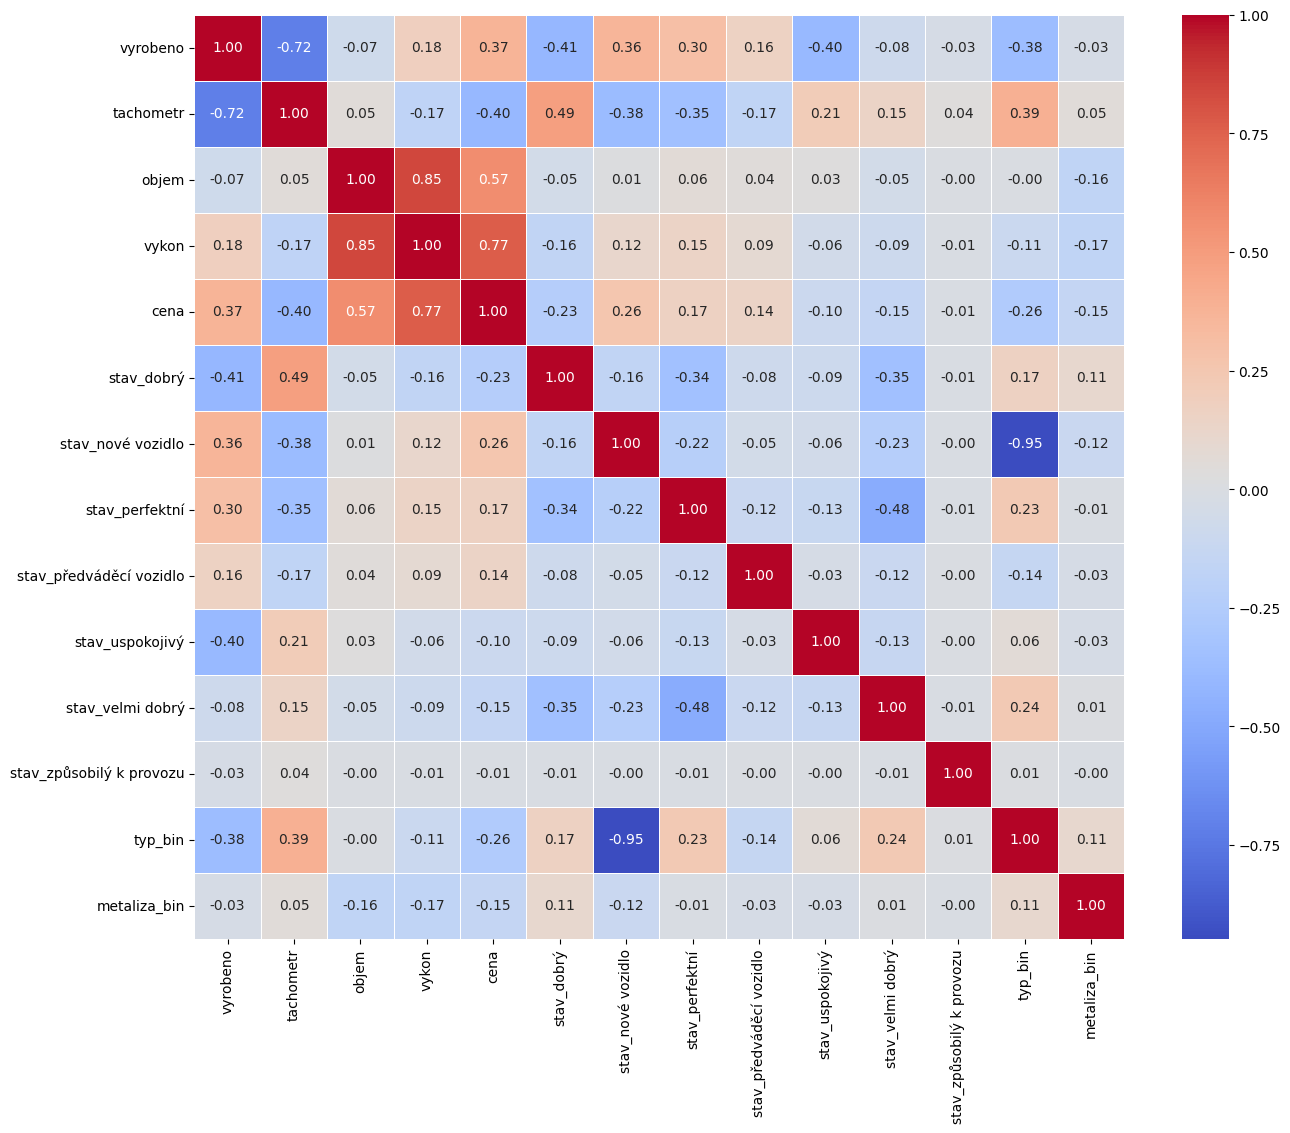

In [5]:
# Vypočet korelací mezi atributy
correlation_matrix = data_encoded.corr()

# Vizualizace korelací
plt.figure(figsize=(15, 12)) 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()